In [14]:
import sqlite3, os, sys, pickle
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

### First let's inspect the data and how to interact with the sql db file

In [15]:

db_path = "../db_files/dev_level7_mu_e_tau_oscweight_000/data/dev_level7_mu_e_tau_oscweight_000.db"
conn = sqlite3.connect(db_path) # this simply connects everything to the .db file. Can be used withs pandas read_sql
cursor = conn.cursor() # used as a cursor from where we can execute commands and interact more directly with the db
## for example ##
# cursor.execute(f"SELECT name FROM sqlite_master WHERE type='table';")
## General syntax is select feature from tablefile (features/truth) where condition limit x offset start

## e.g. "select distinct event_no from truth where pid = 13 limit 1 offset {n_data}"

In [16]:
lim=int(1e2)
# getting truth for all events (there are 3 milllion so you can turn it down with limit)
df_true=pd.read_sql(f'select * from truth ORDER BY RANDOM() limit {lim}', conn)
stop=df_true.iloc[-1]['event_no']

In [17]:
# min(np.unique(df_all.loc[df_all['pid']==13]['event_no']))

In [18]:
#you should only do this if you really want some randomized data it takes forever but not a lot of memory
ids=df_true['event_no'].to_numpy()
ids=[str(idd) for idd in ids]
df_features=pd.read_sql(f'select * from features where event_no is {str(ids[0])}', conn)
for i in tqdm(range(1,len(ids))):
    df0=pd.read_sql(f'select * from features where event_no is {str(ids[i])}', conn)
    df_features.append(df0, ignore_index=1)

In [7]:
id0=tuple(df_true['event_no'])
df_features1=pd.read_sql(f'select * from features WHERE event_no IN {id0}', conn)

In [8]:
#if not random
# df_features=pd.read_sql(f'select * from features where event_no<={stop}', conn)

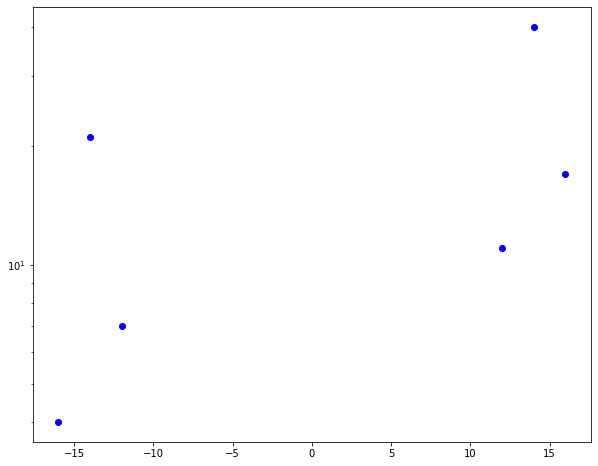

In [9]:
#investigating particle types, pid is particle identification, - indicates antiparticle
#12=electron neutrino, 13=muon, 14=muon neutrino, 16=tau neutrino
pids=df_true['pid'].to_numpy()
ptypes, counts = np.unique(pids, return_counts=True)
fig, ax=plt.subplots(figsize=(10,8))
ax.plot(ptypes, counts, 'bo')
ax.set(yscale='log');
#by far the largest part is pure muons.

In [21]:
transformers = pd.read_pickle("../db_files/dev_level7_mu_e_tau_oscweight_000/data/meta/transformers.pkl")
trans_x      = transformers['features']
trans_y      = transformers['truth']


for col in transformers['features'].keys():
    df_features[col] = trans_x[col].inverse_transform(np.array(df_features[col]).reshape(1, -1)).T

for col in transformers['truth'].keys():
    df_true[col] = trans_y[col].inverse_transform(np.array(df_true[col]).reshape(1, -1)).T

Taking a look a the different distributions for truth and features

1. truth 
2. features

In [ ]:
# note that so far we have worked on scaled stuff, not it's scaled to the real values!
fig, ax=plt.subplots(ncols=3,nrows=4, figsize=(15,20))
ax=ax.flatten()
for i, col in enumerate(df_true.columns):
    if i!=0 and i<=12:
        ax[i-1].hist(df_true[col], label=col)
        ax[i-1].set(title=col, xlabel=col, ylabel='N')
        
fig.tight_layout()

In [ ]:
df_true.describe()

In [ ]:
# only select the good stuff
in_feat=['dom', 'dom_x', 'dom_y', 'dom_z','time',
       'charge_log10', 'lc', 'pulse_width', 'SplitInIcePulses',
       'SRTInIcePulses']
fig, ax=plt.subplots(ncols=5,nrows=2, figsize=(15,8))
ax=ax.flatten()
for i, col in enumerate(in_feat):
    ax[i].hist(df_features[col], label=col, histtype='step')
    ax[i].set(title=col, xlabel=col, ylabel='N', yscale='log')
        
fig.tight_layout()

In [ ]:
df_features.describe()

## We can also take a look at some of the distributions Mads Ehrhorn had already made

In [ ]:
distributions = pd.read_pickle("data/distributions.pkl")